In [3]:
#k-means
from scipy.spatial import distance



class K_means:
    def __init__(self,k,n = 20):
        self.k  = k
        self.n = n
    def fit(self,x,centers = None):
        if centers is None:
            idx = np.random.randint(low = 0,high = len(x),size = self.k)
            centers = x[idx]
            inters = 0
        while inters < self.n:
            points_set = {key:[] for key in range(self.k)}
            for p in x:
                nearest_index = np.argmin(distance.cdist([p], centers, 'euclidean'))
                points_set[nearest_index].append(p)
                
            for i_k in self.k:
                centers[i_k] =sum( points_set[i_k])/len(points_set[i_k])
            inters += 1
        return points_set, centers
                
                
        

In [ ]:
#层次聚类

In [6]:
import numpy as np

class HierarchicalClustering:
    def __init__(self, n_clusters=2, linkage='single'):
        self.n_clusters = n_clusters
        self.linkage = linkage

    def fit(self, X):
        self.X = X
        self.n_samples = X.shape[0]
        self.clusters = [{i} for i in range(self.n_samples)]

        while len(self.clusters) > self.n_clusters:
            closest_i, closest_j = self.find_closest_clusters()
            self.merge_clusters(closest_i, closest_j)

    def find_closest_clusters(self):
        closest_distance = float('inf')
        closest_i, closest_j = -1, -1
        for i in range(len(self.clusters)):
            for j in range(i + 1, len(self.clusters)):
                distance = self.compute_cluster_distance(self.clusters[i], self.clusters[j])
                if distance < closest_distance:
                    closest_distance = distance
                    closest_i, closest_j = i, j
        return closest_i, closest_j

    def compute_cluster_distance(self, cluster1, cluster2):
        distances = [np.linalg.norm(self.X[i] - self.X[j]) for i in cluster1 for j in cluster2]
        if self.linkage == 'single':
            return min(distances)
        elif self.linkage == 'complete':
            return max(distances)
        elif self.linkage == 'average':
            return np.mean(distances)

    def merge_clusters(self, i, j):
        self.clusters[i] = self.clusters[i].union(self.clusters[j])
        self.clusters.pop(j)

    def get_labels(self):
        labels = np.empty(self.n_samples, dtype=int)
        for label, cluster in enumerate(self.clusters):
            for i in cluster:
                labels[i] = label
        return labels


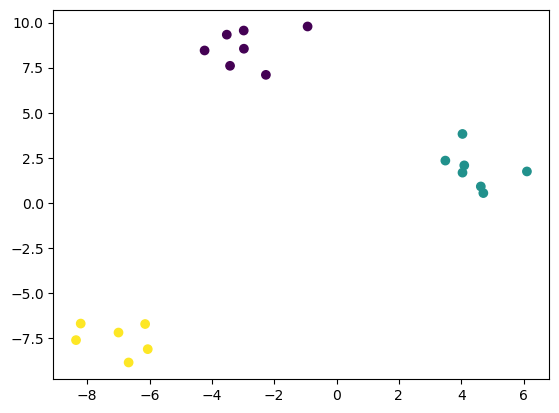

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# 生成随机数据
X, _ = make_blobs(n_samples=20, centers=3, n_features=2, random_state=42)

# 执行层次聚类
model = HierarchicalClustering(n_clusters=3, linkage='average')
model.fit(X)
labels = model.get_labels()

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()
